In [1]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

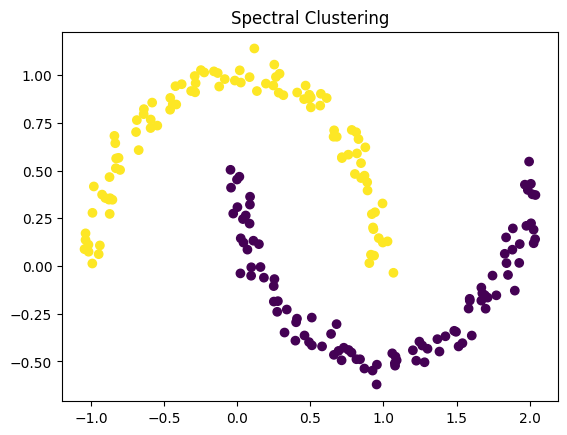

In [2]:


class SpectralClustering:
    def __init__(self, n_clusters, n_neighbors=10):
        self.n_clusters = n_clusters
        self.n_neighbors = n_neighbors

    def fit(self, X):
        # Construct similarity matrix
        self.similarity_matrix = self._construct_similarity_matrix(X)

        # Construct degree matrix
        degree_matrix = np.diag(np.sum(self.similarity_matrix, axis=1))

        # Construct Laplacian matrix
        laplacian_matrix = degree_matrix - self.similarity_matrix

        # Compute the eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)

        # Select the first k eigenvectors
        self.embedding = eigenvectors[:, :self.n_clusters]

        # Use KMeans to cluster the points in the new space
        kmeans = KMeans(n_clusters=self.n_clusters)
        self.labels_ = kmeans.fit_predict(self.embedding)

    def _construct_similarity_matrix(self, X):
        # Compute pairwise distances
        distances = cdist(X, X)

        # Use a Gaussian (RBF) kernel to construct the similarity matrix
        sigma = np.mean(distances)
        similarity_matrix = np.exp(-distances ** 2 / (2. * sigma ** 2))

        # Keep only the k-nearest neighbors
        knn_similarity_matrix = np.zeros_like(similarity_matrix)
        for i in range(similarity_matrix.shape[0]):
            knn_indices = np.argsort(similarity_matrix[i, :])[-self.n_neighbors:]
            knn_similarity_matrix[i, knn_indices] = similarity_matrix[i, knn_indices]
            knn_similarity_matrix[knn_indices, i] = similarity_matrix[knn_indices, i]

        return knn_similarity_matrix

    def predict(self, X):
        # Predict the cluster for each point
        return self.labels_

# Example usage
if __name__ == "__main__":
    # Sample data
    from sklearn.datasets import make_moons
    import matplotlib.pyplot as plt

    X, y = make_moons(n_samples=200, noise=0.05)

    # Perform Spectral Clustering
    sc = SpectralClustering(n_clusters=2, n_neighbors=10)
    sc.fit(X)
    labels = sc.predict(X)

    # Plot the results
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title("Spectral Clustering")
    plt.show()
